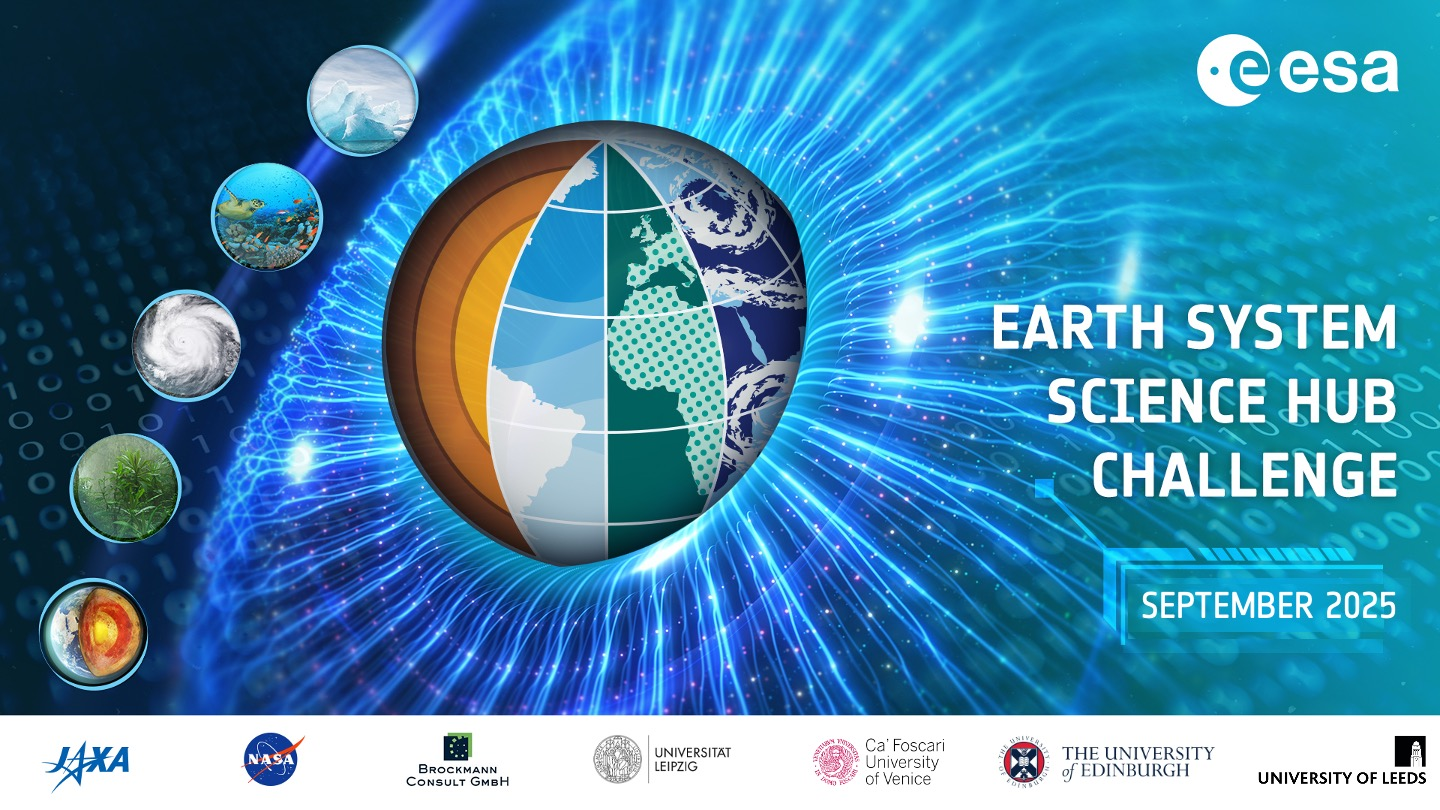

<div class="alert alert-info" role="alert">This concise notebook demonstrates guidelines for submission of your projects developed under the <b>Earth System Science Open Challenge!</b><br>
Please use this notebook as a template for delivering your workflow with the code you used to produce the results! 
<br> 
For more information, refer to Open Challenge website: <a href="https://eo4society.esa.int/event/sciencehubchallengefeb2024/" target="_blank">https://eo4society.esa.int/event/sciencehubchallengefeb2024/ </a> <br> 
</div>

# PART 1: SUMMARY

<hr>

# <a id='section1'></a><span style='color:DarkCyan'> 1. Title </center> </span>
**Author(s):**  <br>
**Group name:**  <br> 
**Challenge:** select one of the suggested topics: <a href="https://eo4society.esa.int/wp-content/uploads/2024/02/Earth-System-Science-Hub-Challenges-February-2024-PREVIEW.pdf" target="_blank">link to challenges</a> <br> 

**Submission date:** <br> 
**Remember to RENAME your notebook with your team name (or full name in case of individual project) and challenge number!**
<br> 
<span style='color:Red'>Please note the submission deadline is **31st July 2025!** </span> 

# <a id='section2'></a><span style='color:DarkCyan'> 2. Description </center> </span>

### Description of research approach
Please use this space to provide short description to the scientific problem you tackle in this notebook. Provide short information on what would you like to achieve. 



# <a id='section3'></a><span style='color:DarkCyan'> 3. Table of Contents </center> </span> 

 1. [Title](#section1)
 2. [Description](#section2)
 3. [Table of Contents](#section3)
 4. [References](#section4)
 5. [Key Conclusions](#section5)
 6. [Societal Context](#section6)
 7. [Import libraries](#section7)
 8. [Access dataset](#section8)
 9. [Analysis cells](#section9)


# <a id='section4'></a><span style='color:DarkCyan'> 4. References </center> </span>

Provide internal and external documentation that you used.

# <a id='section5'></a><span style='color:DarkCyan'> 5. Key Conclusions </center> </span>

Please explain briefly the results of your exploration and the key conclusions that you reached.

# <a id='section6'></a><span style='color:DarkCyan'> 6. Societal Context </center> </span>

Please explain briefly why this is important for society.


# PART 2: SCIENTIFIC EXPLOITATION AND ANALYSIS

<hr>

# <a id='section7'></a><span style='color:DarkCyan'> 7. Import Libraries </center> </span>

**This notebook runs with the python environment `deepesdl-xcube-1.1.2`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

In [2]:
# It is good idea to keep all imports of libraries in this cell
import xcube

# <a id='section8'></a><span style='color:DarkCyan'> 8. Data sources </center> </span>

Please update the table with information about dataset used for your specific case. *Table below provides just an example of the available variable description, please update it according to your case study!* <br> 

| Datacube name | Variable name| Description  | Reference* | Region | Time range | Resolution | 
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| (ESDC) v3.0.1 | air_temperature_2m | <a href="https://deepesdl.readthedocs.io/en/latest/datasets/ESDC/#air_temperature_2m" target="_blank">metadata description</a> | <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overviewhttps://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview" target="_blank">link to source</a> | region name | temporal reoslution | spatial resolution | <br>

*:*In case your dataset is not incorporated in public xcube store, please indicate the location of your dataset in these other repositories by updating* <b> Reference</b> *field*.


Here you can start with accessing the relevant data for your project 

In [4]:
# CODE SECTION

# <a id='section9'></a><span style='color:DarkCyan'> 9. Analysis cells </center> </span>


Please comment your code, describe the functions, remove dead and unreachable code.  


In [4]:
# CODE SECTION

<div class="alert alert-success" role="alert">

## SUBMIT YOUR RESULTS!
---------------------
Submit final version of your notebook in team-shared folder within DeepESDL Jupyter Lab! 
</div>

<br>

<span style='color:Red'>Please note the submission deadline is <b>31st July 2025! </b></span> 
